# Problem Statement

1. To automate the process of recommendations, the store needs to analyze the given attributes of the product, like the style, season, etc., and come up with a model to predict the recommendation of products (in binary output – 0 or 1) accordingly.
	
2. In order to stock the inventory, the store wants to analyze the sales data and predict the trend of total sales for each dress for an extended period of three more alternative days.
	
3. To decide the pricing for various upcoming clothes, they wish to find how the style, season, and material affect the sales of a dress and if the style of the dress is more influential than its price.
	
4. Also, to increase sales, the management wants to analyze the attributes of dresses and find which are the leading factors affecting the sale of a dress.
	
5. To regularize the rating procedure and find its efficiency, the store wants to find if the rating of the dress affects the total sales

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the DataFrame

In [ ]:
ad = pd.read_csv('Attribute DataSet.csv')
ds = pd.read_csv('Dress Sales.csv')

In [ ]:
ad.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


In [ ]:
ds.head()

,Dress_ID,29/8/2013,31/8/2013,2/9/2013,4/9/2013,6/9/2013,8/9/2013,10/9/2013,12/9/2013,14/9/2013,16/9/2013,18/9/2013,20/9/2013,22/9/2013,24/9/2013,26/9/2013,28/9/2013,30/9/2013,2/10/2013,4/10/2013,6/10/2013,8/10/2010,10/10/2013,12/10/2013
0,1006032852,2114,2274,2491,2660,2727,2887,2930,3119,3204,3277,3321,3386,3479,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048
1,1212192089,151,275,570,750,813,1066,1164,1558,1756,1878,1985,2106,2454,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277
2,1190380701,6,7,7,7,8,8,9,10,10,10,10,10,11,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11
3,966005983,1005,1128,1326,1455,1507,1621,1637,1723,1746,1783,1796,1812,1845,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963
4,876339541,996,1175,1304,1396,1432,1559,1570,1638,1655,1681,1743,1824,1919,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736


In [ ]:
ad.shape

(500, 14)

In [ ]:
ds.shape

(500, 24)

In [ ]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        500 non-null    int64  
 1   Style           500 non-null    object 
 2   Price           498 non-null    object 
 3   Rating          500 non-null    float64
 4   Size            500 non-null    object 
 5   Season          498 non-null    object 
 6   NeckLine        497 non-null    object 
 7   SleeveLength    498 non-null    object 
 8   waiseline       413 non-null    object 
 9   Material        372 non-null    object 
 10  FabricType      234 non-null    object 
 11  Decoration      264 non-null    object 
 12  Pattern Type    391 non-null    object 
 13  Recommendation  500 non-null    int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 54.8+ KB


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    500 non-null    int64  
 1   29/8/2013   500 non-null    int64  
 2   31/8/2013   500 non-null    int64  
 3   2/9/2013    500 non-null    int64  
 4   4/9/2013    500 non-null    int64  
 5   6/9/2013    500 non-null    int64  
 6   8/9/2013    500 non-null    int64  
 7   10/9/2013   500 non-null    int64  
 8   12/9/2013   500 non-null    object 
 9   14/9/2013   500 non-null    object 
 10  16/9/2013   500 non-null    object 
 11  18/9/2013   500 non-null    object 
 12  20/9/2013   500 non-null    object 
 13  22/9/2013   500 non-null    object 
 14  24/9/2013   500 non-null    int64  
 15  26/9/2013   263 non-null    float64
 16  28/9/2013   500 non-null    int64  
 17  30/9/2013   227 non-null    float64
 18  2/10/2013   225 non-null    float64
 19  4/10/2013   226 non-null    f

In [ ]:
duplicate = ds[ds.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [Dress_ID, 29/8/2013, 31/8/2013, 2/9/2013, 4/9/2013, 6/9/2013, 8/9/2013, 10/9/2013, 12/9/2013, 14/9/2013, 16/9/2013, 18/9/2013, 20/9/2013, 22/9/2013, 24/9/2013, 26/9/2013, 28/9/2013, 30/9/2013, 2/10/2013, 4/10/2013, 6/10/2013, 8/10/2010, 10/10/2013, 12/10/2013]
Index: []


This shows that the column - 'Dress ID' has duplicate rows

# Removing Duplicate rows having same Dress ID

In [ ]:
ds = ds.drop_duplicates(subset='Dress_ID', keep='first')

In [ ]:
ds.shape

(475, 24)

##Setting Dress_ID as index

In [ ]:
ds.set_index('Dress_ID',inplace = True)

Making another column 'sum' which will calculate the sum of all row values

In [ ]:
ds['sum'] = ds.sum(axis = 1 , skipna = True)

In [ ]:
ds.head()

,29/8/2013,31/8/2013,2/9/2013,4/9/2013,6/9/2013,8/9/2013,10/9/2013,12/9/2013,14/9/2013,16/9/2013,18/9/2013,20/9/2013,22/9/2013,24/9/2013,26/9/2013,28/9/2013,30/9/2013,2/10/2013,4/10/2013,6/10/2013,8/10/2010,10/10/2013,12/10/2013,sum
Dress_ID,,,,,,,,,,,,,,,,,,,,,,,,
1006032852,2114,2274,2491,2660,2727,2887,2930,3119,3204,3277,3321,3386,3479,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048,56193.0
1212192089,151,275,570,750,813,1066,1164,1558,1756,1878,1985,2106,2454,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277,40519.0
1190380701,6,7,7,7,8,8,9,10,10,10,10,10,11,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11,162.0
966005983,1005,1128,1326,1455,1507,1621,1637,1723,1746,1783,1796,1812,1845,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963,28986.0
876339541,996,1175,1304,1396,1432,1559,1570,1638,1655,1681,1743,1824,1919,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736,33617.0


# Finding the Null Values in the dataframe

Filled Null values in each row with avg sales of the dress

In [ ]:
is_NaN = ds.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = ds[row_has_NaN]
print(rows_with_NaN)

            29/8/2013  31/8/2013  2/9/2013  ...  10/10/2013  12/10/2013      sum
Dress_ID                                    ...                                 
851945460        1168       1271      1301  ...         NaN        1798  17475.0
1150275464         84        130       176  ...         NaN         606   3892.0
1026634314        804        837       897  ...         NaN        1258  12033.0
978773911         911        946      1035  ...         NaN        1709  15245.0
827791337        2184       2228      2309  ...         NaN        2388  27844.0
...               ...        ...       ...  ...         ...         ...      ...
737461130           0          0         0  ...         NaN         598   5259.0
663993130           0          0         0  ...         NaN          93    719.0
743417270           0          0         0  ...         NaN         177   1601.0
798898277           0          0         0  ...         NaN         528   5033.0
549401113           0       

In [ ]:
for i in row_has_NaN.index:
  ds.loc[i] = ds.loc[i].fillna(value = ds.loc[i]['sum']/17)

In [ ]:
ds.head()

,29/8/2013,31/8/2013,2/9/2013,4/9/2013,6/9/2013,8/9/2013,10/9/2013,12/9/2013,14/9/2013,16/9/2013,18/9/2013,20/9/2013,22/9/2013,24/9/2013,26/9/2013,28/9/2013,30/9/2013,2/10/2013,4/10/2013,6/10/2013,8/10/2010,10/10/2013,12/10/2013,sum
Dress_ID,,,,,,,,,,,,,,,,,,,,,,,,
1006032852,2114,2274,2491,2660,2727,2887,2930,3119,3204,3277,3321,3386,3479,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048,56193.0
1212192089,151,275,570,750,813,1066,1164,1558,1756,1878,1985,2106,2454,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277,40519.0
1190380701,6,7,7,7,8,8,9,10,10,10,10,10,11,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11,162.0
966005983,1005,1128,1326,1455,1507,1621,1637,1723,1746,1783,1796,1812,1845,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963,28986.0
876339541,996,1175,1304,1396,1432,1559,1570,1638,1655,1681,1743,1824,1919,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736,33617.0


In [ ]:
ds.drop(columns=['sum'],axis = 1, inplace = True)

In [ ]:
ds['sum'] = ds.sum(axis = 1 , skipna = True)

In [ ]:
ad = ad.drop_duplicates(subset='Dress_ID', keep='first')

In [ ]:
ad.shape

(475, 14)

In [ ]:
ad.set_index('Dress_ID',inplace = True)

In [ ]:
ad['sum'] = ds['sum']

##Cleaning attributes dataset

In [ ]:
ad.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation,sum
Dress_ID,,,,,,,,,,,,,,
1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1,56193.0
1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0,40519.0
1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0,162.0
966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1,28986.0
876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0,33617.0


###Cleaning features with duplicate classes

In [ ]:
ad = ad.replace('sexy', 'Sexy', regex=True) # All data frame
ad = ad.replace('low', 'Low', regex=True) # All data frame
ad = ad.replace('high', 'High', regex=True) # All data frame
ad = ad.replace('s', 'S', regex=True) # All data frame
ad = ad.replace('small', 'S', regex=True) # All data frame
ad = ad.replace('Small', 'S', regex=True) # All data frame
ad = ad.replace('Automn', 'Autumn', regex=True) # All data frame
ad = ad.replace('modal', 'model', regex=True) # All data frame
ad = ad.replace('leapord', 'leopard', regex=True) # All data frame
ad = ad.replace('sleevless', 'sleeveless', regex=True)
ad = ad.replace('sleeevless', 'sleeveless', regex=True)
ad = ad.replace('sleveless', 'sleeveless', regex=True)
ad = ad.replace( 'threequater' ,  'threequarter', regex=True)
ad = ad.replace('threequater', 'threequarter', regex=True)
ad = ad.replace('thressqatar', 'threequarter', regex=True)
ad = ad.replace('urndowncollor', 'turndowncollor', regex=True)
ad = ad.replace('capsleeves', 'cap-sleeves', regex=True)
ad = ad.replace('half', 'halfsleeve', regex=True)
ad = ad.replace( 'halfsleevesleeve' ,  'halfsleeve', regex=True)
ad = ad.replace('halfsleevesleeve', 'halfsleeve', regex=True)
ad = ad.replace('tturndowncollor', 'turndowncollor', regex=True)
ad = ad.replace( 'sattin' ,  'satin' , regex=True)
ad = ad.replace('sattin', 'satin', regex=True)
ad = ad.replace('wollen', 'woolen', regex=True)
ad = ad.replace('knitting', 'knitted', regex=True)
ad = ad.replace('shiffon', 'chiffon', regex=True)

###Filling NULL Values

In [ ]:
ad = ad.fillna({"waiseline": "natural"})
ad = ad.fillna({"Material": "cotton"})
ad = ad.fillna({"FabricType": "chiffon"})
ad = ad.fillna({"Decoration": "lace"})
ad = ad.fillna({"Pattern Type": "solid"})
ad = ad.fillna({"Price": "Average"})
ad = ad.fillna({"Season": "Summer"})
ad = ad.fillna({"NeckLine": "o-neck"})
ad = ad.fillna({"SleeveLength": "sleevless"})

In [ ]:
is_NaN = ad.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = ad[row_has_NaN]
print(rows_with_NaN)

Empty DataFrame
Columns: [Style, Price, Rating, Size, Season, NeckLine, SleeveLength, waiseline, Material, FabricType, Decoration, Pattern Type, Recommendation, sum]
Index: []


In [ ]:
ad.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation,sum
Dress_ID,,,,,,,,,,,,,,
1006032852,Sexy,Low,4.6,M,Summer,o-neck,SleevleSS,empire,cotton,chiffon,ruffleS,animal,1,56193.0
1212192089,CaSual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,chiffon,ruffleS,animal,0,40519.0
1190380701,vintage,High,0.0,L,Autumn,o-neck,full,natural,polySter,chiffon,lace,print,0,162.0
966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,Silk,chiffon,embroidary,print,1,28986.0
876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0,33617.0


##Label Encoding the categorical values

In [ ]:
"""Label encoding"""
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object\
le = LabelEncoder()

In [ ]:
# Get  columns whose data type is object i.e. string
filteredColumns = ad.dtypes[ad.dtypes == np.object]
# list of columns whose data type is object i.e. string
listOfColumnNames = list(filteredColumns.index)
print(listOfColumnNames)

['Style', 'Price', 'Size', 'Season', 'NeckLine', 'SleeveLength', 'waiseline', 'Material', 'FabricType', 'Decoration', 'Pattern Type']


In [ ]:
label_encoders = {}
for column in listOfColumnNames:
  label_encoders[column] = le
  ad[column] = label_encoders[column].fit_transform(ad[column]) 

In [ ]:
ad.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation,sum
Dress_ID,,,,,,,,,,,,,,
1006032852,5,2,4.6,1,2,9,4,1,7,6,22,2,1,56193.0
1212192089,1,2,0.0,0,2,9,0,2,11,6,22,2,0,40519.0
1190380701,10,1,0.0,0,0,9,9,2,17,6,14,11,0,162.0
966005983,0,0,4.6,0,1,9,9,2,1,6,10,11,1,28986.0
876339541,7,2,4.5,1,2,9,6,2,6,6,5,4,0,33617.0


##Preparing test and train data 

In [ ]:
y = ad['sum']

In [ ]:
ad.drop(columns=['sum'],axis = 1, inplace = True)

In [ ]:
X = ad

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Applying Models

###Linear regression

In [ ]:
"""Applying Linear regression"""
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
model = LinearRegression()
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
test_score = mean_absolute_error(y_test_pred,y_test)
print('test MAE = ',test_score)

test MAE =  4493.055012374571


###KNN regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV 

In [ ]:
"""Applying KNN"""
model =  KNeighborsRegressor()
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21]}
grid_search = GridSearchCV(estimator = model , param_grid = param_grid, cv = 5,scoring='neg_mean_absolute_error',return_train_score=True,n_jobs =-1,verbose = 3)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,
                                         21]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=3)

In [ ]:
"""Printing best params"""
print('best parameter : ',grid_search.best_params_)


best parameter :  {'n_neighbors': 15}


In [ ]:
"""Applying KNN using best params"""
model =  KNeighborsRegressor(n_neighbors=15)
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
test_score = mean_absolute_error(y_test_pred,y_test)
print('test MAE = ',test_score)

test MAE =  5097.38080495356


###Decision Tree regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
"""Hypertuning Decsion tree regreesor"""
model = DecisionTreeRegressor(random_state=5)
params = {'max_depth': [1, 5, 10,20,30,40, 50], 'min_samples_split': [5, 10, 100, 500,1000]}
grid_search = GridSearchCV(estimator = model , param_grid = params, cv = 3,scoring='neg_mean_absolute_error',return_train_score=True,verbose = 7,refit =True,n_jobs =-1 )
grid_search.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 35 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    0.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=5, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 20, 30, 40, 50],
                         'min_samples_split': [5, 10, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [ ]:
"""Printing best params"""

print('best parameter : ',grid_search.best_params_)

best parameter :  {'max_depth': 5, 'min_samples_split': 100}


In [ ]:
"""Applying model with best params"""
model =  DecisionTreeRegressor(max_depth = 5 ,min_samples_split = 100 )
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
test_score = mean_absolute_error(y_test_pred,y_test)
print('test MAE = ',test_score)

test MAE =  3873.7023361055653


###Random forest regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor


In [ ]:
"""Creating param grid"""
#reference -> https://analyticsindiamag.com/guide-to-hyperparameters-tuning-using-gridsearchcv-and-randomizedsearchcv/
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers 

max_features = ['auto', 'log2']

max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 

max_depth.append(None)

bootstrap = [True, False]

r_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'bootstrap': bootstrap}



In [ ]:
""""Hypertuning Random forest """
from sklearn.model_selection import RandomizedSearchCV
rfr = RandomForestRegressor(random_state = 1)
rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=r_grid, n_iter = 20, scoring='neg_mean_absolute_error', cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

rfr_random.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
"""Printing best params"""
print(rfr_random.best_params_)

{'n_estimators': 6, 'max_features': 'log2', 'max_depth': 5, 'bootstrap': True}


In [ ]:
"""Training with best params"""
model = RandomForestRegressor(n_estimators = 6,n_jobs = -1,max_features = 'log2' ,max_depth = 5,bootstrap = True)
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
test_score = mean_absolute_error(y_test_pred,y_test)
print('test MAE = ',test_score)

test MAE =  4278.9622027738405


##ADAboost regressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
import matplotlib.pyplot as plt

In [ ]:
params = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
 }
abreg = AdaBoostRegressor()
gridsearch=GridSearchCV(abreg, params, cv=5, return_train_score=True)
gridsearch.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
gridsearch.best_params_

{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 50}

In [ ]:
model = AdaBoostRegressor(learning_rate= 0.01 ,loss='linear',n_estimators=50)
model.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.01, loss='linear',
                  n_estimators=50, random_state=None)

In [ ]:
y_test_pred = model.predict(X_test)
test_score = mean_absolute_error(y_test_pred,y_test)
print('test MAE = ',test_score)

test MAE =  4104.456323754719


##Applying the best model

In [ ]:
"""Applying model with best params"""
model =  DecisionTreeRegressor(max_depth = 5 ,min_samples_split = 100 )
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
test_score = mean_absolute_error(y_test_pred,y_test)
print('test MAE = ',test_score)

test MAE =  3873.7023361055653


##Calculating Feature Importances

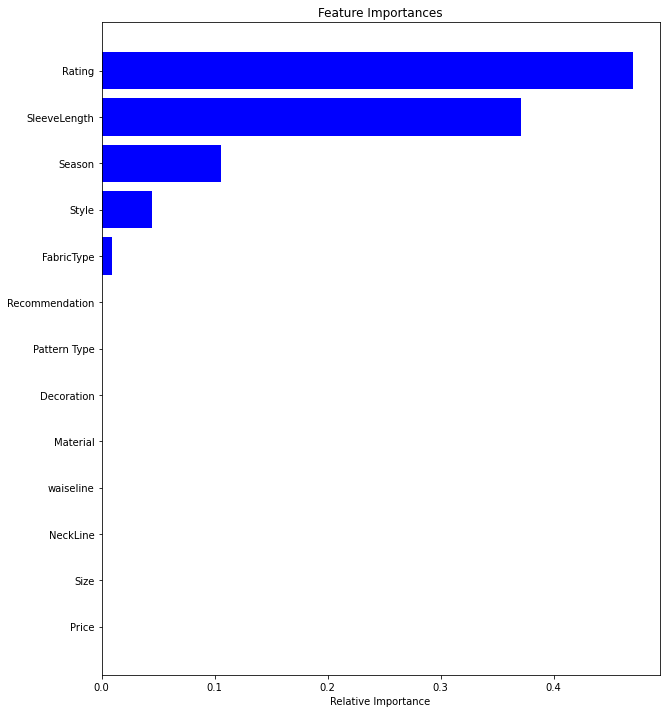

In [ ]:
features = ad.columns
importances = model.feature_importances_
indices = (np.argsort(importances))[-100:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

###OBSERVATIONS: - 
1. We can clearly see that Style of the dress has more influence than the price of the dress on the sales of the dress.

2. The leading factors which affect the sales of the dress are Rating , SleeveLength , Season , Style and Fabric Type
3.The rating of the dress has the maximum influence on total sales .

# Forecasting the next 3 days sales for each dress Id

In [ ]:
ds.head()

,29/8/2013,31/8/2013,2/9/2013,4/9/2013,6/9/2013,8/9/2013,10/9/2013,12/9/2013,14/9/2013,16/9/2013,18/9/2013,20/9/2013,22/9/2013,24/9/2013,26/9/2013,28/9/2013,30/9/2013,2/10/2013,4/10/2013,6/10/2013,8/10/2010,10/10/2013,12/10/2013,sum
Dress_ID,,,,,,,,,,,,,,,,,,,,,,,,
1006032852,2114,2274,2491,2660,2727,2887,2930,3119,3204,3277,3321,3386,3479,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048,56193.0
1212192089,151,275,570,750,813,1066,1164,1558,1756,1878,1985,2106,2454,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277,40519.0
1190380701,6,7,7,7,8,8,9,10,10,10,10,10,11,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11,162.0
966005983,1005,1128,1326,1455,1507,1621,1637,1723,1746,1783,1796,1812,1845,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963,28986.0
876339541,996,1175,1304,1396,1432,1559,1570,1638,1655,1681,1743,1824,1919,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736,33617.0


In [ ]:
ds.drop(columns=['sum'],axis = 1, inplace = True)

In [ ]:
ds.head()

,29/8/2013,31/8/2013,2/9/2013,4/9/2013,6/9/2013,8/9/2013,10/9/2013,12/9/2013,14/9/2013,16/9/2013,18/9/2013,20/9/2013,22/9/2013,24/9/2013,26/9/2013,28/9/2013,30/9/2013,2/10/2013,4/10/2013,6/10/2013,8/10/2010,10/10/2013,12/10/2013
Dress_ID,,,,,,,,,,,,,,,,,,,,,,,
1006032852,2114,2274,2491,2660,2727,2887,2930,3119,3204,3277,3321,3386,3479,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048
1212192089,151,275,570,750,813,1066,1164,1558,1756,1878,1985,2106,2454,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277
1190380701,6,7,7,7,8,8,9,10,10,10,10,10,11,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11
966005983,1005,1128,1326,1455,1507,1621,1637,1723,1746,1783,1796,1812,1845,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963
876339541,996,1175,1304,1396,1432,1559,1570,1638,1655,1681,1743,1824,1919,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736


In [ ]:
ds.reset_index(level=0, inplace=True)
ds

,Dress_ID,29/8/2013,31/8/2013,2/9/2013,4/9/2013,6/9/2013,8/9/2013,10/9/2013,12/9/2013,14/9/2013,16/9/2013,18/9/2013,20/9/2013,22/9/2013,24/9/2013,26/9/2013,28/9/2013,30/9/2013,2/10/2013,4/10/2013,6/10/2013,8/10/2010,10/10/2013,12/10/2013
0,1006032852,2114,2274,2491,2660,2727,2887,2930,3119,3204,3277,3321,3386,3479,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048
1,1212192089,151,275,570,750,813,1066,1164,1558,1756,1878,1985,2106,2454,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277
2,1190380701,6,7,7,7,8,8,9,10,10,10,10,10,11,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11
3,966005983,1005,1128,1326,1455,1507,1621,1637,1723,1746,1783,1796,1812,1845,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963
4,876339541,996,1175,1304,1396,1432,1559,1570,1638,1655,1681,1743,1824,1919,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,990559192,0,0,0,60,62,64,65,67,68,69,70,72,73,73,74.0,75,75.0,76.0,76.0,77,77.0,77.0,77
471,713391965,0,0,0,560,554,544,537,525,519,511,501,492,480,400,388.0,360,364.0,372.0,377.0,380,382.0,384.0,285
472,532874347,0,0,0,734,728,726,715,694,690,686,674,665,658,616,597.0,586,569.0,561.0,555.0,551,546.0,535.0,520
473,655464934,0,0,0,254,259,261,263,268,270,272,272,264,264,257,256.0,255,254.0,253.0,250.0,249,249.0,249.0,248


In [ ]:
new_ds = ds

In [ ]:
ds.set_index('Dress_ID',inplace = True)

In [ ]:
ds.T

Dress_ID,1006032852,1212192089,1190380701,966005983,876339541,1068332458,1220707172,1219677488,1113094204,985292672,1117293701,898481530,957723897,749031896,1055411544,1162628131,624314841,830467746,840857118,1113221101,861754372,856178100,1122989777,840516484,768517084,1139843344,1004212992,1235426503,942808364,629131530,851945460,1150275464,1026634314,978773911,827791337,640823350,801861988,1060207186,1054679816,941190190,...,909624960,1086459983,593007494,660179663,751776863,1253973206,828790972,933413410,550959163,933926000,953168456,1124754999,832949213,801216472,929898500,850490510,1099394392,674885710,1122991519,904781800,974438263,875608094,1061890181,1033144189,860406062,692445545,974775647,1109819647,1223469038,511503677,1190558632,641665398,964917582,859922576,817353671,990559192,713391965,532874347,655464934,919930954
29/8/2013,2114,151,6,1005,996,4,45,4,5,9,15,23,1235,2498,22,4,1587,10,2,122,104,856,145,1292,2,6,986,6,375,7455,1168,84,804,911,2184,1134,1576,19,175,216,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31/8/2013,2274,275,7,1128,1175,5,61,13,6,11,28,38,1333,2545,28,8,1669,13,4,143,106,967,189,1319,3,7,1048,8,421,7467,1271,130,837,946,2228,1482,1680,23,189,261,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2/9/2013,2491,570,7,1326,1304,11,131,55,10,12,42,54,1471,2627,40,19,1729,17,10,243,142,1057,219,1405,4,15,1224,25,463,7479,1301,176,897,1035,2309,1562,1729,45,262,359,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4/9/2013,2660,750,7,1455,1396,13,165,73,12,12,49,59,1568,2656,43,25,1764,17,11,279,163,1109,229,1479,4,19,1358,42,475,7374,1330,205,931,1085,2313,1595,1730,50,319,398,...,25,131,399,107,13,11,129,174,247,148,16,1,62,25,110,608,11,209,3,50,3,67,8,44,154,329,32,8,2,623,1,10,23,433,217,60,560,734,254,538
6/9/2013,2727,813,8,1507,1432,13,176,76,13,12,49,65,1602,2669,44,26,1782,17,11,299,171,1124,229,1512,4,19,1401,49,476,7351,1344,218,937,1105,2313,1604,1730,53,345,417,...,30,138,399,113,16,79,134,176,245,155,16,1,67,25,112,611,12,211,70,50,4,69,9,49,161,321,36,10,2,630,1,10,23,437,219,62,554,728,259,545
8/9/2013,2887,1066,8,1621,1559,13,209,89,15,12,55,72,1722,2738,45,31,1817,17,12,322,192,1173,233,1578,5,19,1571,67,483,7255,1383,272,969,1159,2315,1645,1743,59,427,473,...,33,139,408,131,19,232,139,183,248,157,19,1,68,25,122,619,12,215,77,56,4,72,9,55,174,311,40,13,2,636,1,10,26,451,227,64,544,726,261,558
10/9/2013,2930,1164,9,1637,1570,16,216,94,16,12,56,77,1756,2769,45,35,1833,17,12,331,196,1198,233,1592,5,20,1612,76,488,7240,1395,273,974,1185,2315,1648,1743,62,463,503,...,34,139,407,134,19,314,139,186,245,159,20,1,68,25,122,621,12,216,78,56,5,75,9,58,175,304,42,13,2,640,1,10,29,453,229,65,537,715,263,563
12/9/2013,3119,1558,10,1723,1638,18,251,117,17,13,65,90,1906,2934,49,45,1898,17,12,381,227,1248,233,1671,5,22,1762,105,497,7156,1456,279,1004,1244,2321,1706,1744,66,569,557,...,45,143,417,147,23,322,149,191,245,164,26,1,69,25,139,629,15,219,89,56,5,83,10,61,187,290,56,15,2,645,1,10,37,473,239,67,525,694,268,578
14/9/2013,3204,1756,10,1746,1655,19,262,121,17,13,66,102,1994,3001,50,48,1909,17,13,401,247,1284,233,1689,5,22,1852,114,500,7124,1468,280,1008,1288,2330,1752,1746,71,596,586,...,48,143,435,147,25,322,151,191,245,165,28,0,69,25,143,631,16,220,90,56,6,88,10,66,191,287,58,16,2,645,1,10,40,478,241,68,519,690,270,585
16/9/2013,3277,1878,10,1783,1681,20,289,125,19,13,68,106,2077,3068,51,58,1954,17,13,413,258,1300,233,1738,5,23,1901,134,505,7115,1497,284,1019,1304,2336,1785,1749,74,661,612,...,53,143,355,148,26,315,155,193,247,168,29,1,69,25,148,636,17,222,96,56,6,91,11,69,197,281,59,16,2,644,1,10,46,483,246,69,511,686,272,590
